In [980]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [981]:
#loading our file
df = pd.read_excel("../files/crops.xlsx", sheet_name="CropStats")

#reading and displaying the first 10 rows
print("First 10 rows:")
df.head(10)


First 10 rows:


,Unnamed: 0,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
0,0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.31,NaN,NaN
1,1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.47,NaN,NaN
2,2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.27,NaN,NaN
3,3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.33,NaN,NaN
4,4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.28,NaN,NaN
5,5,1907,Austria,NaN,wheat,NaN,NaN,1907,1.37,NaN,NaN
6,6,1908,Austria,NaN,wheat,NaN,NaN,1908,1.36,NaN,NaN
7,7,1909,Austria,NaN,wheat,NaN,NaN,1909,1.35,NaN,NaN
8,8,1910,Austria,NaN,wheat,NaN,NaN,1910,1.18,NaN,NaN
9,9,1911,Austria,NaN,wheat,NaN,NaN,1911,1.37,NaN,NaN


In [982]:
#reading and displaying the last 10 rows
print("Last 10 rows:")
df.tail(10)

Last 10 rows:


,Unnamed: 0,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
36697,36697,2008,China,zhejiang,wheat,54340.0,212100.0,2008,3.903202,NaN,NaN
36698,36698,2009,China,zhejiang,wheat,60370.0,232400.0,2009,3.849594,NaN,NaN
36699,36699,2010,China,zhejiang,wheat,66170.0,246800.0,2010,3.729787,NaN,NaN
36700,36700,2011,China,zhejiang,wheat,72630.0,270200.0,2011,3.720226,NaN,NaN
36701,36701,2012,China,zhejiang,wheat,74490.0,271000.0,2012,3.638072,NaN,NaN
36702,36702,2013,China,zhejiang,wheat,75520.0,278300.0,2013,3.685117,NaN,NaN
36703,36703,2014,China,zhejiang,wheat,82120.0,309500.0,2014,3.768875,NaN,NaN
36704,36704,2015,China,zhejiang,wheat,89800.0,351300.0,2015,3.912027,NaN,NaN
36705,36705,2016,China,zhejiang,wheat,76590.0,253900.0,2016,3.315054,NaN,NaN
36706,36706,2017,China,zhejiang,wheat,103670.0,419200.0,2017,4.043600,NaN,NaN


In [983]:
#check the columns and their dataypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36707 non-null  int64  
 1   Harvest_year         36707 non-null  int64  
 2   admin0               36707 non-null  object 
 3   admin1               33716 non-null  object 
 4   crop                 36707 non-null  object 
 5   hectares (ha)        35084 non-null  float64
 6   production (tonnes)  34709 non-null  float64
 7   year                 36707 non-null  int64  
 8   yield(tonnes/ha)     34694 non-null  float64
 9   admin2               0 non-null      float64
 10  notes                5641 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.1+ MB


In [984]:
df.rename(columns={
    'admin0' : 'country',
    'admin1' : 'country_region'}, inplace=True)
df.head(10)

,Unnamed: 0,Harvest_year,country,country_region,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
0,0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.31,NaN,NaN
1,1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.47,NaN,NaN
2,2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.27,NaN,NaN
3,3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.33,NaN,NaN
4,4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.28,NaN,NaN
5,5,1907,Austria,NaN,wheat,NaN,NaN,1907,1.37,NaN,NaN
6,6,1908,Austria,NaN,wheat,NaN,NaN,1908,1.36,NaN,NaN
7,7,1909,Austria,NaN,wheat,NaN,NaN,1909,1.35,NaN,NaN
8,8,1910,Austria,NaN,wheat,NaN,NaN,1910,1.18,NaN,NaN
9,9,1911,Austria,NaN,wheat,NaN,NaN,1911,1.37,NaN,NaN


In [985]:
df = df.drop('admin2', axis=1)
df = df.drop('notes', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Harvest_year,country,country_region,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.31
1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.47
2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.27
3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.33
4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.28


In [986]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Harvest_year         36707 non-null  int64  
 1   country              36707 non-null  object 
 2   country_region       33716 non-null  object 
 3   crop                 36707 non-null  object 
 4   hectares (ha)        35084 non-null  float64
 5   production (tonnes)  34709 non-null  float64
 6   year                 36707 non-null  int64  
 7   yield(tonnes/ha)     34694 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.2+ MB


In [987]:
# Define a function to fill missing values in 'yield(tonnes/ha)'
def fill_missing_yield(row):
    yield_per_ha = row['yield(tonnes/ha)']
    if pd.isna(yield_per_ha):
        hectares = row['hectares (ha)']
        production = row['production (tonnes)']
        if pd.notna(hectares) and pd.notna(production) and production != 0:
            return hectares / production
    return yield_per_ha

# Apply the function to fill missing values in 'yield(tonnes/ha)'
df['yield(tonnes/ha)'] = df.apply(fill_missing_yield, axis=1)


In [988]:
df = df.dropna(subset=['yield(tonnes/ha)'])


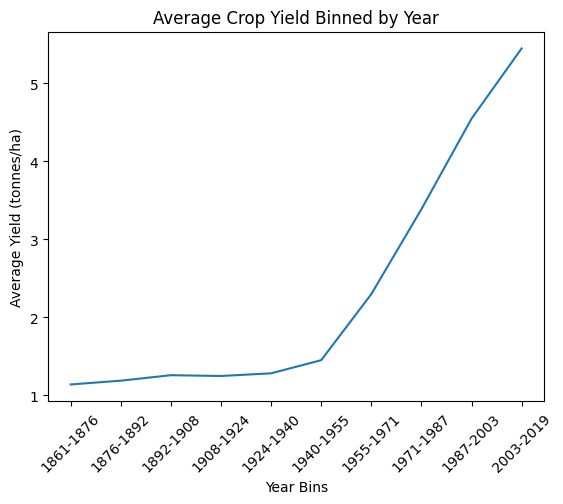

In [989]:
# Determine the minimum and maximum years for binning
min_year = df['year'].min()
max_year = df['year'].max()

# Create 10 equal bins with rounded edges
num_bins = 10
bin_width = (max_year - min_year) / num_bins
bin_edges = [min_year + i * bin_width for i in range(num_bins + 1)]

# Create the 'year_bin' column with binned values
df['year_bin'] = pd.cut(df['year'], bins=bin_edges, include_lowest=True, right=False)

# Group data by 'year_bin' and calculate the mean yield for each bin
binned_data = df.groupby('year_bin')['yield(tonnes/ha)'].mean()

# Convert the 'year_bin' labels to strings
bin_labels = [f"{int(b.left)}-{int(b.right)}" for b in binned_data.index]

# Plot the binned data
plt.plot(bin_labels, binned_data.values)

# Set labels and title
plt.xlabel('Year Bins')
plt.ylabel('Average Yield (tonnes/ha)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title('Average Crop Yield Binned by Year')

# Show the plot
plt.show()

In [990]:
# Count the number of countries before and after 1940
countries_before_1940 = df[df['year'] < 1940]['country'].nunique()
countries_after_1940 = df[df['year'] >= 1940]['country'].nunique()

print("Number of countries in the dataset before 1940:", countries_before_1940)
print("Number of countries in the dataset after 1940:", countries_after_1940)

Number of countries in the dataset before 1940: 25
Number of countries in the dataset after 1940: 25


In [991]:
# Filter data before and after 1940
df_before_1940 = df[df['year'] < 1940]
df_after_1940 = df[df['year'] >= 1940]

# Calculate the average yield for each country before and after 1940
average_yield_before_1940 = df_before_1940.groupby('country')['yield(tonnes/ha)'].mean()
average_yield_after_1940 = df_after_1940.groupby('country')['yield(tonnes/ha)'].mean()

# Get the top 5 countries with the highest average yield before and after 1940
top_5_before_1940 = average_yield_before_1940.nlargest(5)
top_5_after_1940 = average_yield_after_1940.nlargest(5)

# Print the results
print("Top 5 countries with the highest average yield per hectare before 1940:")
print(top_5_before_1940)

print("\nTop 5 countries with the highest average yield per hectare after 1940:")
print(top_5_after_1940)

Top 5 countries with the highest average yield per hectare before 1940:
country
Netherlands       2.541596
Belgium           2.513667
United Kingdom    2.354909
Canada            1.964231
Czech Republic    1.793636
Name: yield(tonnes/ha), dtype: float64

Top 5 countries with the highest average yield per hectare after 1940:
country
Belgium           5.872049
Netherlands       5.751268
United Kingdom    5.499650
France            4.933741
Chile             4.094479
Name: yield(tonnes/ha), dtype: float64


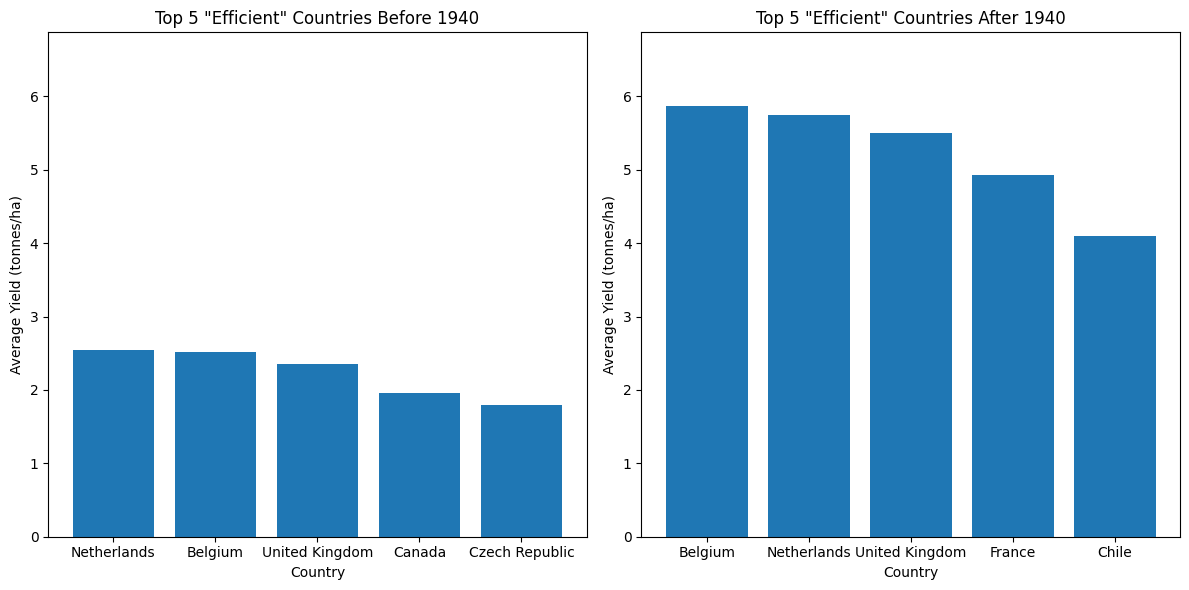

In [992]:
max_value = max(top_10_before_1940.max(), top_10_after_1940.max())

# Create bar charts to visualize the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_5_before_1940.index, top_5_before_1940)
plt.xlabel('Country')
plt.ylabel('Average Yield (tonnes/ha)')
plt.title('Top 5 "Efficient" Countries Before 1940')
plt.ylim(0, max_value + 1)  


plt.subplot(1, 2, 2)
plt.bar(top_5_after_1940.index, top_5_after_1940)
plt.xlabel('Country')
plt.ylabel('Average Yield (tonnes/ha)')
plt.title('Top 5 "Efficient" Countries After 1940')
plt.ylim(0, max_value + 1)  

plt
plt.tight_layout()
plt.show()

In [993]:
# Define a function to calculate the average 'hectares (ha)' for a specific year range
def fill_average_ha(row):
    year = row['year']
    country = row['country']
    # left out part of the condition because some countries did not have data for it
    condition = (df['country'] == country) # & (df['year'] < 1940 if year < 1940 else df['year'] >= 1940)
    average_ha = df.loc[condition, 'hectares (ha)'].mean()
    return average_ha

# Fill missing values in 'hectares (ha)' based on the calculated averages
df['hectares (ha)'] = df.apply(lambda row: fill_average_ha(row) if pd.isna(row['hectares (ha)']) else row['hectares (ha)'], axis=1)


In [994]:
# Define a function to fill missing values in 'production (tonnes)' with 'hectares (ha) * yield(tonnes/ha)'
def fill_missing_production(row):
    production = row['production (tonnes)']
    if pd.isna(production):
        hectares = row['hectares (ha)']
        yield_per_ha = row['yield(tonnes/ha)']
        if pd.notna(hectares) and pd.notna(yield_per_ha):
            return hectares * yield_per_ha
    return production

# Apply the function to fill missing values in 'production (tonnes)'
df['production (tonnes)'] = df.apply(fill_missing_production, axis=1)

In [995]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34715 entries, 0 to 36706
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Harvest_year         34715 non-null  int64   
 1   country              34715 non-null  object  
 2   country_region       31834 non-null  object  
 3   crop                 34715 non-null  object  
 4   hectares (ha)        34715 non-null  float64 
 5   production (tonnes)  34715 non-null  float64 
 6   year                 34715 non-null  int64   
 7   yield(tonnes/ha)     34715 non-null  float64 
 8   year_bin             34714 non-null  category
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 2.4+ MB


In [996]:
df = df.drop('year_bin', axis=1)
df = df.drop('Harvest_year', axis=1)

In [997]:
df['country_region'].fillna("Not specified", inplace=True)

df.isna().any()


country                False
country_region         False
crop                   False
hectares (ha)          False
production (tonnes)    False
year                   False
yield(tonnes/ha)       False
dtype: bool

In [998]:
# #encode the country_region
# df['country_region'] = df['country_region'].astype('category')

# df_encoded =  enc.fit_transform(df[['country_region']])
# country_region_encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=enc.get_feature_names_out(['country_region']))

# df = pd.concat([df, country_region_encoded_df], axis=1)
# df = df.drop('country_region', axis=1)

In [999]:
# #encode the country
# df['country'] = df['country'].astype('category')
# enc = OneHotEncoder()

# df_encoded =  enc.fit_transform(df[['country']])
# country_encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=enc.get_feature_names_out(['country']))

# df = pd.concat([df, country_encoded_df], axis=1)
# df = df.drop('country', axis=1)

In [1000]:
# # Identify the columns to one-hot encode and the columns to keep
# columns_to_encode = ['country', 'country_region']
# columns_to_keep = [col for col in df.columns if col not in columns_to_encode]

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse=False)

# # Fit and transform the selected columns
# encoded_columns = encoder.fit_transform(df[columns_to_encode])

# # Create a DataFrame from the one-hot encoded array with appropriate column names
# encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

# # Concatenate the one-hot encoded DataFrame with the original DataFrame, keeping the columns to keep
# df_encoded = pd.concat([df[columns_to_keep], encoded_columns_df], axis=1)
# df = df_encoded

In [1001]:
# df = df.fillna(0)
df.head()

,country,country_region,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,Austria,Not specified,wheat,285197.421053,373608.621579,1902,1.31
1,Austria,Not specified,wheat,285197.421053,419240.208947,1903,1.47
2,Austria,Not specified,wheat,285197.421053,362200.724737,1904,1.27
3,Austria,Not specified,wheat,285197.421053,379312.570000,1905,1.33
4,Austria,Not specified,wheat,285197.421053,365052.698947,1906,1.28


In [1002]:
df.tail()

,country,country_region,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
36702,China,zhejiang,wheat,75520.0,278300.0,2013,3.685117
36703,China,zhejiang,wheat,82120.0,309500.0,2014,3.768875
36704,China,zhejiang,wheat,89800.0,351300.0,2015,3.912027
36705,China,zhejiang,wheat,76590.0,253900.0,2016,3.315054
36706,China,zhejiang,wheat,103670.0,419200.0,2017,4.043600


In [1003]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34715 entries, 0 to 36706
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              34715 non-null  object 
 1   country_region       34715 non-null  object 
 2   crop                 34715 non-null  object 
 3   hectares (ha)        34715 non-null  float64
 4   production (tonnes)  34715 non-null  float64
 5   year                 34715 non-null  int64  
 6   yield(tonnes/ha)     34715 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.1+ MB


In [1004]:
# split the data
feature_cols = df.columns.tolist()

feature_cols.remove('crop')
feature_cols.remove('country')
feature_cols.remove('country_region')
X = df[feature_cols]

y = df['crop']



print(feature_cols)
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

['hectares (ha)', 'production (tonnes)', 'year', 'yield(tonnes/ha)']


In [1005]:
#verify contents of X
print(X)

       hectares (ha)  production (tonnes)  year  yield(tonnes/ha)
0      285197.421053        373608.621579  1902          1.310000
1      285197.421053        419240.208947  1903          1.470000
2      285197.421053        362200.724737  1904          1.270000
3      285197.421053        379312.570000  1905          1.330000
4      285197.421053        365052.698947  1906          1.280000
...              ...                  ...   ...               ...
36702   75520.000000        278300.000000  2013          3.685117
36703   82120.000000        309500.000000  2014          3.768875
36704   89800.000000        351300.000000  2015          3.912027
36705   76590.000000        253900.000000  2016          3.315054
36706  103670.000000        419200.000000  2017          4.043600

[34715 rows x 4 columns]


In [1006]:
#verify contents of y
print(y)

0        wheat
1        wheat
2        wheat
3        wheat
4        wheat
         ...  
36702    wheat
36703    wheat
36704    wheat
36705    wheat
36706    wheat
Name: crop, Length: 34715, dtype: object


In [1007]:
clf_rf = RandomForestClassifier(n_estimators=1001, max_leaf_nodes=16, n_jobs=1)
clf_lr = LogisticRegression(max_iter=1000)

clf_rf = clf_rf.fit(X_train, y_train)
clf_lr = clf_lr.fit(X_train, y_train)

rf accuracy: 0.6188967305199482


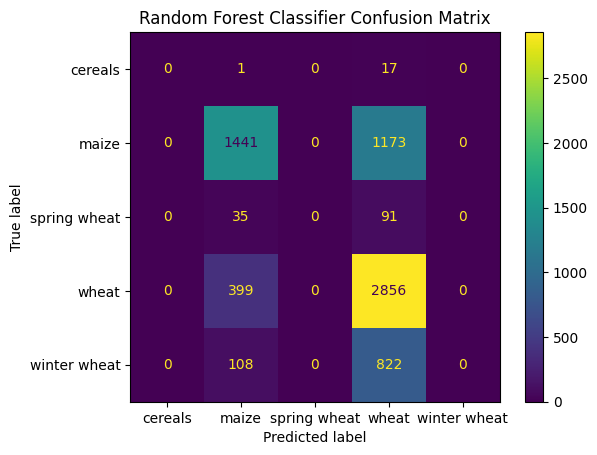

In [1008]:
rf_y_pred = clf_rf.predict(X_test)

print("rf accuracy:", metrics.accuracy_score(y_test, rf_y_pred))

#random forest confusion matrix

rf_cm = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=np.unique(y))

disp.plot()
plt.title("Random Forest Classifier Confusion Matrix")

plt.show()

lr accuracy: 0.4888376782370733


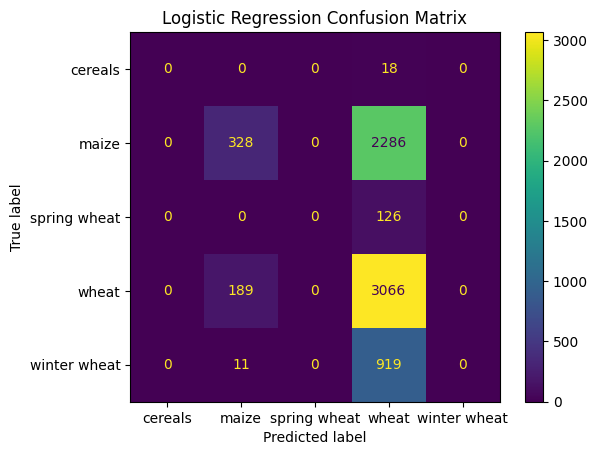

In [1009]:
lr_y_pred = clf_lr.predict(X_test)

print("lr accuracy:", metrics.accuracy_score(y_test, lr_y_pred))

#lr confusion matrix

lr_cm = confusion_matrix(y_test, lr_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=np.unique(y))

disp.plot()
plt.title("Logistic Regression Confusion Matrix")

plt.show()